<a href="https://colab.research.google.com/github/tusharsingh9820/LinkedIn/blob/main/LinkedIN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.pinimg.com/736x/cc/ee/1e/ccee1e38e0361e7a26b5ee7a93b51715.jpg)
#**About dataset**
### Every day, thousands of companies and individuals turn to LinkedIn in search of talent.This dataset contains a nearly comprehensive record of 33,000+ job postings listed over the course of 2 days, months apart.Each individual posting contains 27 valuable attributes,including the title, job description, salary, location, application URL, and work-types (remote, contract, etc), in addition to separate files containing the benefits, skills, and industries associated with each posting. The majority of jobs are also linked to a company, which are all listed in another csv file containing attributes such as the company description, headquarters location, and number of employees, and follower count.

### With so many datapoints, the potential for exploration of this dataset is vast and includes exploring the highest compensated titles, companies, and locations; predicting salaries/benefits through NLP; and examining how industries and companies vary through their internship offerings and benefits. Future updates will permit further exploration into time-based trends, including company growth, prevalence of remote jobs, and demand of individual job titles over time.

#**Importing the required libraries for EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Data Cleaning**

##**Company_detail**

###**1. Loading the company data into the data frame.**

In [ ]:
company_industries = pd.read_csv('/content/company_industries.csv')
company_specialities = pd.read_csv('/content/company_specialities.csv')
employee_counts = pd.read_csv('/content/employee_counts.csv')
company = pd.read_csv('/content/companies.csv')

In [ ]:
company_specialities

,company_id,speciality
0,81149246,Childrens Music Education
1,81149246,Foundational Music Theory
2,81149246,Child Music Lessons
3,81149246,social emotional learning
4,81149246,social emotional development
...,...,...
78400,2293632,LED Billboards
78401,2293632,Electronic Message Centers
78402,2293632,Digital Signage
78403,2293632,Outdoor Digital Signage


In [ ]:
employee_counts.columns

Index(['company_id', 'employee_count', 'follower_count', 'time_recorded'], dtype='object')

In [ ]:
company.company_size.unique().size

8

###**2. Remove not needed columns**

In [ ]:
employee_counts.drop(['follower_count','time_recorded'],axis=1,inplace=True)

In [ ]:
company.drop(['state','description','city','zip_code','address'],axis=1,inplace=True)

In [ ]:
company.head(6)

,company_id,name,company_size,country,url
0,1009,IBM,7.0,US,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,7.0,US,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,7.0,US,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,7.0,US,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,7.0,US,https://www.linkedin.com/company/oracle
5,1033,Accenture,7.0,IE,https://www.linkedin.com/company/accenture


###**3.Joining the all three dataframe into one**

In [ ]:
company_detail= pd.merge(company_industries, company_specialities, on='company_id')
company_detail = pd.merge(company_detail, employee_counts, on='company_id')
company_detail = pd.merge(company_detail, company, on='company_id')

###**4.Rearrranging the columns**

In [ ]:
company_detail.rename(columns={'company_id':'Company_ID', 'industry':'Industry','employee_count':'Employee_Count', 'name':'Name',
       'company_size':'Company_Size', 'country':'Country','speciality':'Speciality'}, inplace=True)

In [ ]:
company_detail=company_detail[['Company_ID','Name','Industry','Speciality','Country','Company_Size','Employee_Count']]

In [ ]:
company_detail.columns

Index(['Company_ID', 'Name', 'Industry', 'Speciality', 'Country',
       'Company_Size', 'Employee_Count'],
      dtype='object')

###**5.Renaming the column**

In [ ]:
company_detail.rename(columns={'Country':'country_code'}, inplace=True)

###**6.Creating column with country name**

In [ ]:
country_code = {
    'Country': [
        "United States", "United Kingdom", "", "Canada", "Finland", "India", "Australia", "Germany", "Mexico",
        "Ireland", "Spain", "France", "Denmark", "Netherlands", "Switzerland", "Iceland", "Hong Kong", "Belgium",
        "China", "Israel", "Sweden", "Singapore", "South Korea", "Norway", "Taiwan", "New Zealand", "Italy",
        "Luxembourg", "Austria", "Japan", "Vietnam", "", "United Arab Emirates", "Saudi Arabia", "Turkey",
        "Bermuda", "Kenya", "Croatia", "Estonia", "Liechtenstein", "Malta"],
    'country_code': [
        "US", "GB", "0", "CA", "FI", "IN", "AU", "DE", "MX", "IE", "ES", "FR", "DK", "NL", "CH", "IS", "HK", "BE",
        "CN", "IL", "SE", "SG", "KR", "NO", "TW", "NZ", "IT", "LU", "AT", "JP", "VN", "OO", "AE", "SA", "TR", "BM",
        "KE", "HR", "EE", "LI", "MT"]}



In [ ]:
country_code=pd.DataFrame(country_code)

####**Merging country name with its code**

In [ ]:
company_detail = company_detail.merge(country_code, on='country_code')

####**Putting name in blank cell**

In [ ]:
company_detail.loc[company_detail['Country'] == '', 'Country'] = 'Unknown'

###**7.Removing column**

In [ ]:
company_detail.drop(['Company_Size','country_code'],axis=1,inplace=True)

### **8.Uploading filtered dataframe of company**

In [ ]:
company_detail.to_csv(r'T:\Data Analytics Project\LinkIn 2023\company_detail.csv')

##**Job_detail**

###**1. Loading the job data into the data frame.**

In [ ]:
job_industries = pd.read_csv('/content/job_industries.csv')
benefits = pd.read_csv('/content/benefits.csv')
job_skills = pd.read_csv('/content/job_skills.csv')
salaries = pd.read_csv('/content/salaries.csv')

In [ ]:
industries = pd.read_csv('/content/industries.csv')
skills = pd.read_csv('/content/skills.csv')

In [ ]:
job_industries

In [ ]:
benefits

In [ ]:
benefits.inferred.value_counts()

In [ ]:
job_skills

In [ ]:
salaries

In [ ]:
salaries.currency.unique()

In [ ]:
salaries.compensation_type.unique()

In [ ]:
salaries.pay_period.unique()

###**2.Calculate the salary on monthly basis.**

In [ ]:
def calculate_adjusted_salary(row):
    if row['pay_period'] == 'HOURLY':
        return row['max_salary'] * 160
    elif row['pay_period'] == 'WEEKLY':
        return row['max_salary'] * 4
    elif row['pay_period'] == 'YEARLY':
        return row['max_salary'] / 12
    else:
        return row['max_salary']

# Apply the function to each row to calculate adjusted salary
salaries['max_monthly_salary'] = salaries.apply(calculate_adjusted_salary, axis=1)

In [ ]:
def calculate_adjusted_salary(row):
    if row['pay_period'] == 'HOURLY':
        return row['min_salary'] * 160
    elif row['pay_period'] == 'WEEKLY':
        return row['min_salary'] * 4
    elif row['pay_period'] == 'YEARLY':
        return row['min_salary'] / 12
    else:
        return row['min_salary']

# Apply the function to each row to calculate adjusted salary
salaries['min_monthly_salary'] = salaries.apply(calculate_adjusted_salary, axis=1)

###**3. Remove not needed columns**

In [ ]:
salaries.columns

In [ ]:
salaries.drop(['max_salary','med_salary','min_salary','currency','compensation_type'],axis=1,inplace=True)

###**4.Joining the all three dataframe of job into one.**

In [ ]:
job_details= pd.merge(job_industries, benefits, on='job_id')
job_details = pd.merge(job_details, job_skills, on='job_id')
job_details = pd.merge(job_details, salaries, on='job_id')
job_details= pd.merge(job_details, skills, on='skill_abr')
job_details= pd.merge(job_details, industries, on='industry_id')

In [ ]:
job_details

,job_id,industry_id,inferred,type,skill_abr,salary_id,pay_period,max_monthly_salary,min_monthly_salary,skill_name,industry_name
0,3690843087,47,0,Medical insurance,ACCT,2,YEARLY,5416.666667,4583.333333,Accounting/Auditing,Accounting
1,3690843087,47,0,Dental insurance,ACCT,2,YEARLY,5416.666667,4583.333333,Accounting/Auditing,Accounting
2,3690843087,47,0,401(k),ACCT,2,YEARLY,5416.666667,4583.333333,Accounting/Auditing,Accounting
3,3690843087,47,0,Paid maternity leave,ACCT,2,YEARLY,5416.666667,4583.333333,Accounting/Auditing,Accounting
4,3690843087,47,0,Disability insurance,ACCT,2,YEARLY,5416.666667,4583.333333,Accounting/Auditing,Accounting
...,...,...,...,...,...,...,...,...,...,...,...
40370,3749903774,3207,1,401(k),HCPR,11023,YEARLY,6416.666667,5375.000000,Health Care Provider,"Health, Wellness & Fitness"
40371,3694112265,3200,1,Disability insurance,EDU,3271,YEARLY,5695.114167,3146.769167,Education,Education Management
40372,3694112265,3200,1,401(k),EDU,3271,YEARLY,5695.114167,3146.769167,Education,Education Management
40373,3749357034,3200,1,Disability insurance,EDU,10975,YEARLY,10352.511667,5719.768333,Education,Education Management


In [ ]:
job_details.columns

Index(['job_id', 'industry_id', 'inferred', 'type', 'skill_abr', 'salary_id',
       'pay_period', 'max_monthly_salary', 'min_monthly_salary', 'skill_name',
       'industry_name'],
      dtype='object')

###**5.Rearranging the columns**

In [ ]:
job_details.rename(columns={'job_id':'Job_ID', 'industry_id':'Industry_ID', 'inferred':'Inferred','type':'Type','salary_id':'Salary_ID',
       'pay_period':'Pay_Period', 'max_monthly_salary':'Max_monthly_salary', 'min_monthly_salary':'Min_monthly_salary', 'skill_name':'Skill_Name',
       'industry_name':'Industry_Name'}, inplace=True)

In [ ]:
job_details=job_details[['Job_ID','Type','Skill_Name','Min_monthly_salary', 'Max_monthly_salary',
                         'Pay_Period','Inferred','Industry_ID','Industry_Name','Salary_ID']]

###**6.Managing pay period column**

In [ ]:
job_details.Pay_Period.unique()

array(['YEARLY', 'HOURLY', 'MONTHLY', 'WEEKLY', 'ONCE'], dtype=object)

In [ ]:
job_details[job_details.Pay_Period=='ONCE']

,Job_ID,Type,Skill_Name,Min_monthly_salary,Max_monthly_salary,Pay_Period,Inferred,Industry_ID,Industry_Name,Salary_ID
18468,3757734808,Dental insurance,Marketing,68.0,68.0,ONCE,1,104,Staffing and Recruiting,12052
18492,3757734808,Dental insurance,Product Management,68.0,68.0,ONCE,1,104,Staffing and Recruiting,12052


In [ ]:
job_details.drop(job_details[job_details.Pay_Period=='ONCE'].index,inplace=True)
job_details.drop('Pay_Period',axis=1,inplace=True)

<ipython-input-124-ff5c9b56c784>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_details.drop(job_details[job_details.Pay_Period=='ONCE'].index,inplace=True)
<ipython-input-124-ff5c9b56c784>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_details.drop('Pay_Period',axis=1,inplace=True)


###**7.Rounding all numbers to 2 decimal place**

In [ ]:
job_details=job_details.round(2)

### **8.Uploading filtered dataframe of job**

In [ ]:
job_details.to_csv(r'T:\Data Analytics Project\LinkIn 2023\job_detail.csv') #uploading joined dataframe

##**Job_posting**

###**1. Loading the job data into the data frame.**

In [ ]:
job_postings = pd.read_csv('/content/job_postings.csv')

In [ ]:
job_postings

In [ ]:
job_postings.formatted_work_type.unique()

In [ ]:
job_postings.work_type.unique()

array(['OffsiteApply', 'SimpleOnsiteApply', 'ComplexOnsiteApply'],
      dtype=object)

In [ ]:
job_postings.application_type.unique()

In [ ]:
job_postings=job_postings.round(0)

###**2.Remove null rows of particular column.**

In [ ]:
job_postings.dropna(subset=['job_id','company_id','work_type'],inplace=True)

###**3. Remove not needed columns.**

In [ ]:
job_postings.columns

Index(['job_id', 'company_id', 'Job_title', 'work_type', 'applies',
       'remote_allowed', 'application_type', 'experience_level'],
      dtype='object')

In [ ]:
job_postings.drop(['max_salary','med_salary','min_salary','pay_period','sponsored','views','job_posting_url','application_url','currency',
       'compensation_type', 'scraped'],axis=1,inplace=True)

In [ ]:
job_postings.drop(['description','location','original_listed_time','listed_time','skills_desc','expiry','closed_time','posting_domain'],axis=1,inplace=True)
job_postings.drop(['work_type'],axis=1,inplace=True)

###**4.Renaming the column**

In [ ]:
job_postings.rename(columns={'Type':'benefits_type','title':'Job_title','formatted_work_type':'work_type','formatted_experience_level':'experience_level'}, inplace=True)

### **5.Uploading filtered dataframe.**

In [ ]:
job_postings.to_csv(r'T:\Data Analytics Project\LinkIn 2023\job_post.csv') #uploading joined dataframe

#**Data Analysis**

###**Job_detail**

In [ ]:
Job_detail = pd.read_csv('/content/job_detail.csv')

In [ ]:
Job_detail.rename(columns={'Type':'benefits_type'}, inplace=True)
Job_detail.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
Job_detail.drop

<bound method DataFrame.drop of            Job_ID         benefits_type            Skill_Name  \
0      3690843087     Medical insurance   Accounting/Auditing   
1      3690843087      Dental insurance   Accounting/Auditing   
2      3690843087                401(k)   Accounting/Auditing   
3      3690843087  Paid maternity leave   Accounting/Auditing   
4      3690843087  Disability insurance   Accounting/Auditing   
...           ...                   ...                   ...   
40368  3749903774                401(k)  Health Care Provider   
40369  3694112265  Disability insurance             Education   
40370  3694112265                401(k)             Education   
40371  3749357034  Disability insurance             Education   
40372  3749357034                401(k)             Education   

       Min_monthly_salary  Max_monthly_salary  Inferred  Industry_ID  \
0                 4583.33             5416.67         0           47   
1                 4583.33             5416.67         0           47   
2                 4583.33             5416.67         0           47   
3                 4583.33             5416.67         0           47   
4                 4583.33             5416.67         0           47   
...                   ...                 ...       ...          ...   
40368             5375.00             6416.67         1         3207   
40369             3146.77             5695.11         1         3200   
40370             3146.77             5695.11         1         3200   
40371             5719.77            10352.51         1         3200   
40372             5719.77            10352.51         1         3200   

                    Industry_Name  Salary_ID  
0                      Accounting          2  
1                      Accounting          2  
2                      Accounting          2  
3                      Accounting          2  
4                      Accounting          2  
...                           ...        ...  
40368  Health, Wellness & Fitness      11023  
40369        Education Management       3271  
40370        Education Management       3271  
40371        Education Management      10975  
40372        Education Management      10975  

[40373 rows x 9 columns]>

In [ ]:
Job_detail

In [ ]:
Job_detail.columns

Index(['Job_ID', 'benefits_type', 'Skill_Name', 'Min_monthly_salary',
       'Max_monthly_salary', 'Inferred', 'Industry_ID', 'Industry_Name',
       'Salary_ID'],
      dtype='object')

###**Job_post**

In [ ]:
Job_post = pd.read_csv('/content/job_post.csv')

In [ ]:
Job_post.rename(columns={'job_id':'Job_ID','company_id':'Company_ID'}, inplace=True)
Job_post.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
Job_post

,Job_ID,Company_ID,Job_title,work_type,applies,remote_allowed,application_type,experience_level
0,3757940104,553718.0,Hearing Care Provider,Full-time,NaN,NaN,OffsiteApply,Entry level
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Full-time,NaN,NaN,OffsiteApply,NaN
2,3757938019,474443.0,"Manager, Engineering",Full-time,NaN,NaN,OffsiteApply,NaN
3,3757938018,18213359.0,Cook,Full-time,NaN,NaN,OffsiteApply,Entry level
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),Full-time,NaN,1.0,OffsiteApply,Mid-Senior level
...,...,...,...,...,...,...,...,...
32587,381055942,96654609.0,Business Manager,Full-time,NaN,NaN,ComplexOnsiteApply,NaN
32588,133196985,1089558.0,Model Risk Auditor,Contract,1.0,NaN,ComplexOnsiteApply,NaN
32589,133114754,77766802.0,Sales Manager,Full-time,NaN,NaN,ComplexOnsiteApply,NaN
32590,102339515,52132271.0,Franchise Owner,Full-time,NaN,NaN,SimpleOnsiteApply,NaN


In [ ]:
Job_post.columns

Index(['Job_ID', 'Company_ID', 'Job_title', 'work_type', 'applies',
       'remote_allowed', 'application_type', 'experience_level'],
      dtype='object')

In [ ]:
Job_post.Job_title.unique().size

22070

###**Company_detail**

In [ ]:
Company_detail = pd.read_csv('/content/company_detail.csv')

In [ ]:
Company_detail.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
Company_detail

,Company_ID,Name,Industry,Speciality,Employee_Count,Country
0,91459053,Uppfront,Internet,online professional network,2,United States
1,91459053,Uppfront,Internet,jobs,2,United States
2,91459053,Uppfront,Internet,people search,2,United States
3,91459053,Uppfront,Internet,company search,2,United States
4,91459053,Uppfront,Internet,address book,2,United States
...,...,...,...,...,...,...
131432,114044,Evolution,IT Services and IT Consulting,Scala,6268,Malta
131433,114044,Evolution,IT Services and IT Consulting,JavaScript,6268,Malta
131434,114044,Evolution,IT Services and IT Consulting,Live video streaming,6268,Malta
131435,114044,Evolution,IT Services and IT Consulting,On-line gaming,6268,Malta


In [ ]:
Company_detail.columns

Index(['Company_ID', 'Name', 'Industry', 'Speciality', 'Employee_Count',
       'Country'],
      dtype='object')

###**Combined DataFrame as LinkedIN & Visualization**

In [ ]:
LinkedIN= pd.merge(Job_detail, Job_post, on='Job_ID')
LinkedIN= pd.merge(LinkedIN, Company_detail, on='Company_ID')

In [ ]:
LinkedIN = LinkedIN.dropna(subset=['Job_ID','Job_title','Company_ID','Industry_Name','Industry_ID','Min_monthly_salary','Max_monthly_salary','experience_level'])

In [ ]:
LinkedIN.drop(['Industry',],axis=1,inplace=True)
LinkedIN.rename(columns={'Name':'Company_name','Industry_Name':'Industry_Type'}, inplace=True)

In [ ]:
LinkedIN.to_csv(r'T:\Data Analytics Project\LinkIn 2023\LinkedIN.csv')

In [ ]:
len(LinkedIN)

In [ ]:
LinkedIN.columns

Index(['Job_ID', 'benefits_type', 'Skill_Name', 'Min_monthly_salary',
       'Max_monthly_salary', 'Inferred', 'Industry_ID', 'Industry_Type',
       'Salary_ID', 'Company_ID', 'Job_title', 'work_type', 'applies',
       'remote_allowed', 'application_type', 'experience_level',
       'Company_name', 'Speciality', 'Employee_Count', 'Country'],
      dtype='object')

In [ ]:
LinkedIN.Skill_Name.value_counts().reset_index(name='Count') #Different Skill count

In [ ]:
LinkedIN.benefits_type.value_counts()  #Types of benefit

401(k)                     225209
Medical insurance          135742
Vision insurance           131690
Dental insurance           121724
Disability insurance        82164
Tuition assistance          39005
Commuter benefits           36129
Paid maternity leave        33542
Paid paternity leave        30555
Pension plan                27659
Child care support          19129
Student loan assistance     18313
Name: benefits_type, dtype: int64

<Axes: >

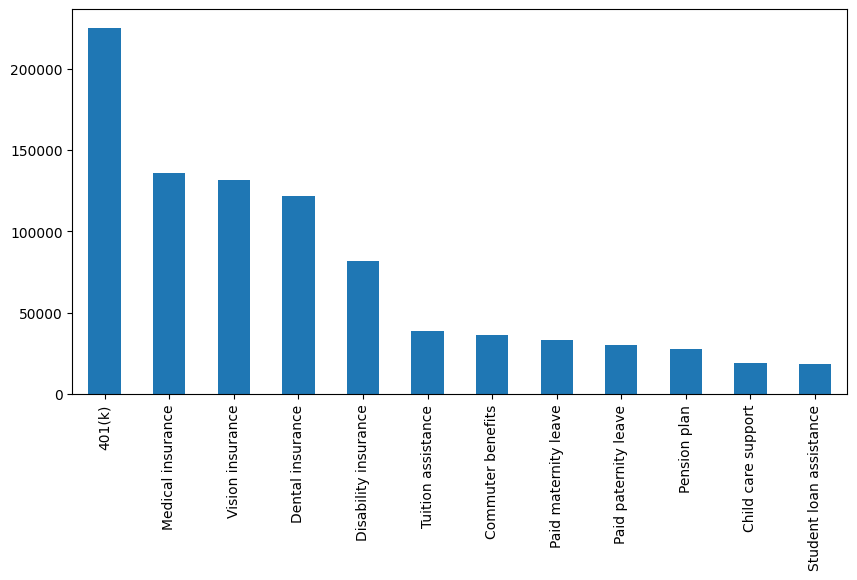

In [ ]:
LinkedIN.benefits_type.value_counts().plot(kind='bar', figsize=(10,5))

In [ ]:
LinkedIN.groupby('Skill_Name')['Min_monthly_salary','Max_monthly_salary'].mean().reset_index() #Salary according to skills

<ipython-input-86-763bda918d7d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  LinkedIN.groupby('Skill_Name')['Min_monthly_salary','Max_monthly_salary'].mean().reset_index()


,Skill_Name,Min_monthly_salary,Max_monthly_salary
0,Accounting/Auditing,6808.332051,8275.267209
1,Administrative,5184.516512,6203.886200
2,Advertising,8327.678764,9224.332616
3,Analyst,5965.675803,7305.822437
4,Art/Creative,5506.193168,6685.334507
5,Business Development,79492.457207,96662.649506
6,Consulting,9709.399976,11958.361129
7,Customer Service,4374.543335,4969.708461
8,Design,6893.071585,8574.865637
9,Distribution,6127.391643,7399.357933


In [ ]:
LinkedIN.Inferred.value_counts() #Inferred count

0    643962
1    256899
Name: Inferred, dtype: int64

<Axes: ylabel='Inferred'>

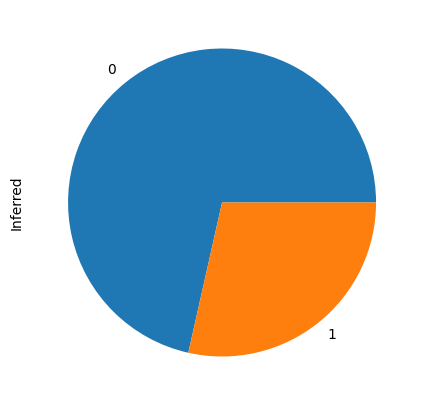

In [ ]:
LinkedIN.Inferred.value_counts().plot(kind='pie', figsize=(10,5))

In [ ]:
LinkedIN.work_type.value_counts() #Work type count

Full-time     829340
Contract       60777
Part-time       6853
Temporary       2847
Other            656
Internship       388
Name: work_type, dtype: int64

<Axes: >

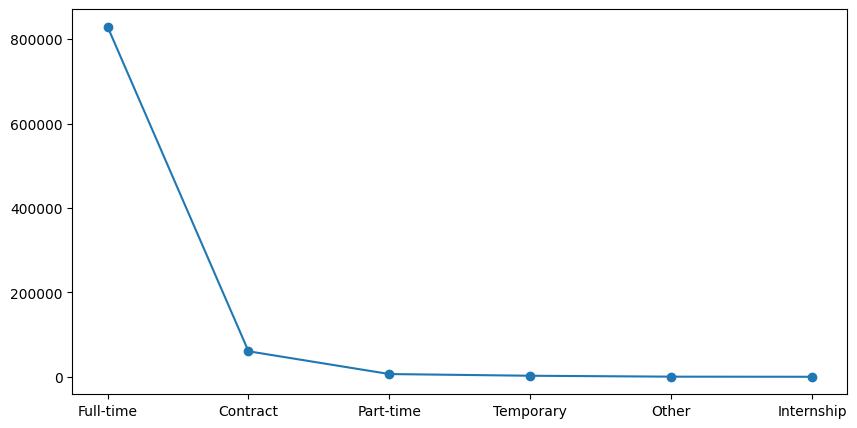

In [ ]:
LinkedIN.work_type.value_counts().plot(kind='line',marker='o', figsize=(10,5))

In [ ]:
LinkedIN.application_type.value_counts() #Number of application type

ComplexOnsiteApply    600401
OffsiteApply          237905
SimpleOnsiteApply      62555
Name: application_type, dtype: int64

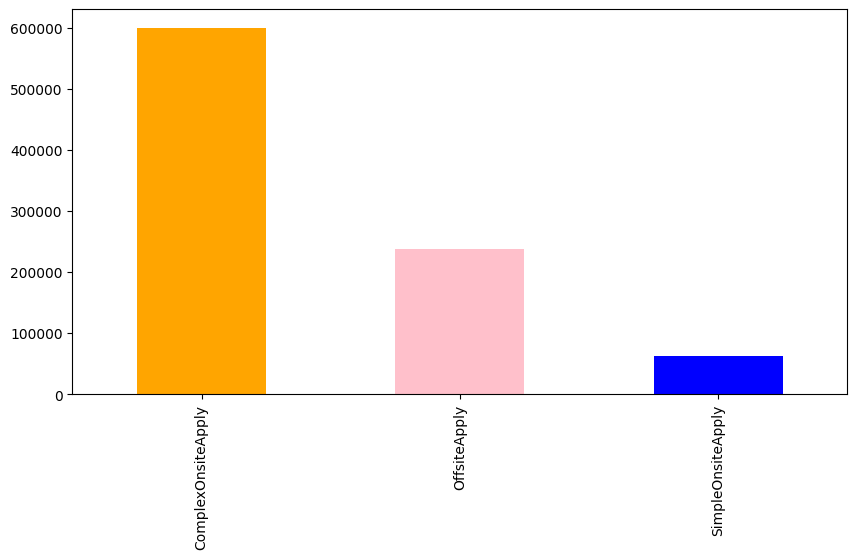

In [ ]:
color_map = ['orange', 'pink', 'blue']
LinkedIN.application_type.value_counts().plot(kind='bar', color=color_map, figsize=(10,5))
plt.show()

In [ ]:
LinkedIN.experience_level.value_counts() #Experience level demand count

Mid-Senior level    412747
Associate           244397
Entry level         162136
Director             61506
Executive            18210
Internship            1865
Name: experience_level, dtype: int64

<Axes: >

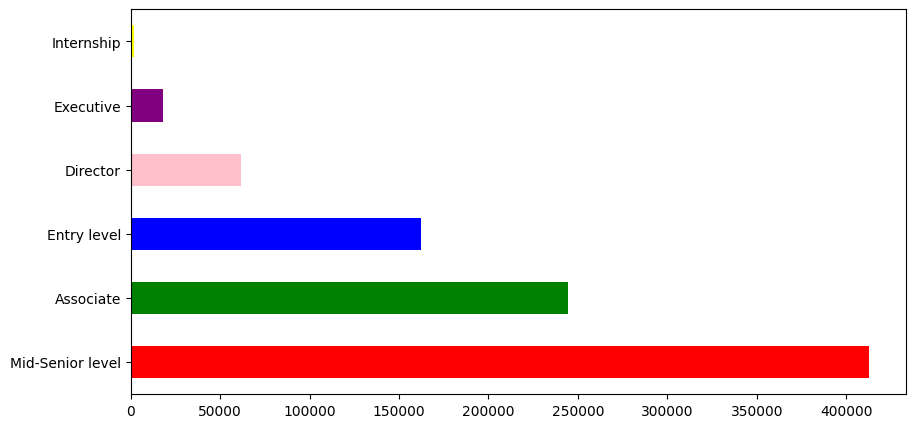

In [ ]:
color_map = ['red', 'green', 'blue', 'pink','purple','yellow']
LinkedIN['experience_level'].value_counts().plot(kind='barh', color=color_map, figsize=(10,5))

In [ ]:
LinkedIN.groupby(['work_type','experience_level'])['remote_allowed'].value_counts().reset_index(name='Count') #Work type count with experience level having remote job

,work_type,experience_level,remote_allowed,Count
0,Contract,Associate,1.0,3376
1,Contract,Entry level,1.0,1676
2,Contract,Mid-Senior level,1.0,4857
3,Full-time,Associate,1.0,29711
4,Full-time,Director,1.0,6420
5,Full-time,Entry level,1.0,9953
6,Full-time,Executive,1.0,2156
7,Full-time,Mid-Senior level,1.0,70617
8,Part-time,Entry level,1.0,280
9,Part-time,Internship,1.0,32


In [ ]:
LinkedIN.groupby(['experience_level'])['application_type'].value_counts().reset_index(name='Count') #application type count with experience type

,experience_level,application_type,Count
0,Associate,ComplexOnsiteApply,201492
1,Associate,OffsiteApply,38533
2,Associate,SimpleOnsiteApply,4372
3,Director,ComplexOnsiteApply,37533
4,Director,OffsiteApply,21665
5,Director,SimpleOnsiteApply,2308
6,Entry level,ComplexOnsiteApply,85356
7,Entry level,OffsiteApply,71575
8,Entry level,SimpleOnsiteApply,5205
9,Executive,ComplexOnsiteApply,8309


<Axes: ylabel='experience_level,application_type'>

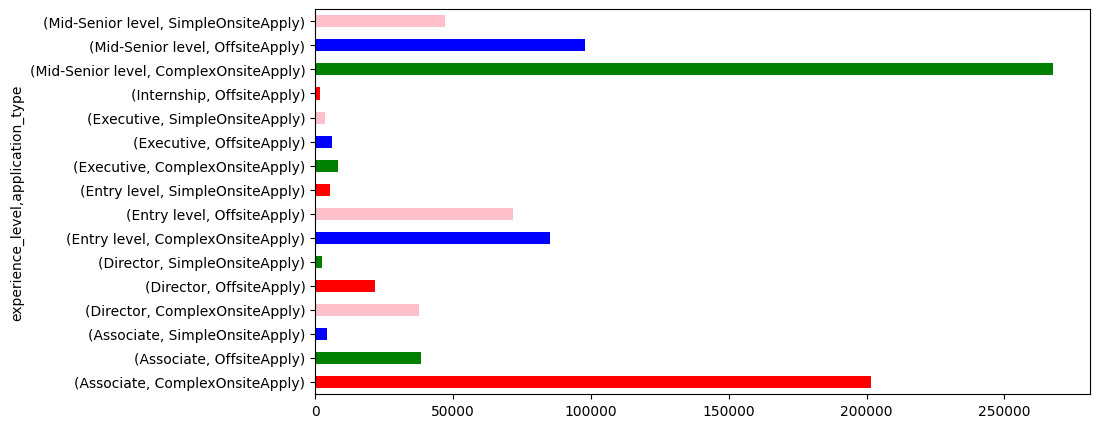

In [ ]:
color_map = ['red', 'green', 'blue', 'pink']
LinkedIN.groupby(['experience_level'])['application_type'].value_counts().plot(kind='barh', color=color_map, figsize=(10,5))

In [ ]:
LinkedIN.Speciality.value_counts().reset_index(name='Count') #Speciality demand count

,index,Count
0,Recruiting,16370
1,Staffing,13766
2,Information Technology,10818
3,Healthcare,10477
4,IT Staffing,9623
...,...,...
8139,global health,1
8140,water research,1
8141,justice research and policyc,1
8142,military behavioral health,1


In [ ]:
LinkedIN.Industry_Type.value_counts().reset_index(name='Count')  #Industry type count

,index,Count
0,Financial Services,83693
1,Staffing and Recruiting,77821
2,Accounting,55023
3,IT Services and IT Consulting,43172
4,Hospitals and Health Care,34746
...,...,...
143,Consumer Goods,12
144,Law Enforcement,10
145,Defense & Space,8
146,"Health, Wellness & Fitness",5


In [ ]:
LinkedIN.Country.value_counts().reset_index(name='Count') #Country with number of companies there

,index,Count
0,United States,840757
1,United Kingdom,47012
2,Belgium,2840
3,Switzerland,1751
4,Canada,1548
5,France,1392
6,India,1280
7,Unknown,1213
8,Netherlands,662
9,Germany,603


In [ ]:
LinkedIN.groupby(['Industry_Type'])['Speciality'].value_counts().reset_index(name='Count') #Industry count with there speciality

,Industry_Type,Speciality,Count
0,Accounting,Staffing,1722
1,Accounting,Recruiting,1682
2,Accounting,Information Technology,1188
3,Accounting,Healthcare,1116
4,Accounting,CFO,1104
...,...,...,...
18750,Wireless Services,Healthcare/VMS,8
18751,Wireless Services,IT,8
18752,Wireless Services,Legal,8
18753,Wireless Services,"Logistics, Manufacturing & Skilled Trade",8


In [ ]:
LinkedIN.columns

Index(['Job_ID', 'benefits_type', 'Skill_Name', 'Min_monthly_salary',
       'Max_monthly_salary', 'Inferred', 'Industry_ID', 'Industry_Type',
       'Salary_ID', 'Company_ID', 'Job_title', 'work_type', 'applies',
       'remote_allowed', 'application_type', 'experience_level',
       'Company_name', 'Speciality', 'Employee_Count', 'Country'],
      dtype='object')

#**Question Answer**

###**Which company has highest job opening?**

In [ ]:
print("Company: ",(LinkedIN.Job_title.value_counts()).idxmax())
print("Count: ",(LinkedIN.Job_title.value_counts()).max())

Company:  Rotational Staff Accountant
Count:  24624


###**Which country has most companies?**


In [ ]:
print("Country: ",(LinkedIN.Country.value_counts()).idxmax())
print("Count: ",(LinkedIN.Country.value_counts()).max())

Country:  United States
Count:  840757


###**Which company has highest employee count?**

In [ ]:
print('Company: ',LinkedIN.loc[LinkedIN['Employee_Count'].idxmax(), 'Company_name'])
print('No. of employee: ',LinkedIN['Employee_Count'].max())

Company:  Amazon
No. of employee:  829111


###**Whick skill is required/demanded most?**

In [ ]:
print("Skill: ",(LinkedIN.Skill_Name.value_counts()).idxmax())

Skill:  Accounting/Auditing


###**Which is highest salary job?**

In [ ]:
print('Job: ',LinkedIN.loc[LinkedIN['Max_monthly_salary'].idxmax(), 'Job_title'])
print('Company name: ',LinkedIN.loc[LinkedIN['Max_monthly_salary'].idxmax(), 'Company_name'])
print('Salary: ',LinkedIN['Max_monthly_salary'].max())

Job:  Director of Business Development
Company name:  Jobot
Salary:  28800000.0


###**Which speciality is demanded most in industry type?**

In [ ]:
print("Speciality: ",(LinkedIN.Speciality.value_counts()).idxmax())

Skill:  Recruiting


###**Number of remote jobs**

In [ ]:
print("Remote jobs: ",len(LinkedIN[LinkedIN.remote_allowed == 1]))

Remote jobs:  130644
